In [2]:
### sztenderd adatkezelő csomagok
import pandas as pd
import numpy as np
import json

### sztenderd vizualizációs csomagok
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

## Adat

In [125]:
with open('bgg_cleaned_data.json') as f:
    data = pd.DataFrame(json.load(f))

In [126]:
data.head(5)

,bgg_rank,name,year,geek_rating,avg_rating,num_voters,min_age,weight,artists,publishers,categories,mechanisms,family,designers,min_player_num,max_player_num,min_play_time,max_play_time
10000,1,Gloomhaven,2017,8.576,8.83,34829,12.0,3.83,"[alexandr elichev, josh t. mcdowell, alvaro ne...","[cephalofair games, albi, asmodee, feuerland s...","[adventure, exploration, fantasy, fighting, mi...","[action retrieval, campaign / battle card driv...","[campaign games, components: miniatures, crowd...",[isaac childres],1.0,4.0,60.0,120.0
10001,2,Pandemic Legacy: Season 1,2015,8.471,8.62,36928,13.0,2.83,[chris quilliams],"[z-man games, inc., asterion press, devir, fil...","[environmental, medical]","[action points, cooperative game, hand managem...","[campaign games, legacy, pandemic]","[rob daviau, matt leacock]",2.0,4.0,60.0,60.0
10002,3,Terraforming Mars,2016,8.277,8.43,53714,12.0,3.24,[isaac fryxelius],"[fryxgames, arclight, fantasmagoria, ghenos ga...","[economic, environmental, industry / manufactu...","[card drafting, end game bonuses, hand managem...","[fryxgames' future timeline, solitaire games, ...",[jacob fryxelius],1.0,5.0,120.0,120.0
10003,4,Brass: Birmingham,2018,8.269,8.63,12686,14.0,3.93,"[lina cossette, david forest, damien mammoliti]","[roxley, boardm factory, conclave editora, cro...","[economic, industry / manufacturing, transport...","[connections, hand management, income, loans, ...","[brass, cities: birmingham (england), country:...","[gavan brown, matt tolman, martin wallace]",2.0,4.0,60.0,120.0
10004,5,Through the Ages: A New Story of Civilization,2015,8.221,8.47,19915,14.0,4.40,"[filip murmak, radim pech, jakub politzer, mil...","[czech games edition, cranio creations, devir,...","[card game, civilization, economic]","[action points, auction/bidding, auction: dutc...","[tableau building, through the ages]",[vlaada chvátil],2.0,4.0,120.0,120.0


In [5]:
data.columns

Index(['bgg_rank', 'name', 'year', 'geek_rating', 'avg_rating', 'num_voters',
       'min_age', 'weight', 'artists', 'publishers', 'categories',
       'mechanisms', 'family', 'designers', 'min_player_num', 'max_player_num',
       'min_play_time', 'max_play_time'],
      dtype='object')

### plusz feature-ök

#### először megnézem, mik a legnépszerűbb kategóriák és mechanizmusok

In [127]:
categories = pd.DataFrame(set(sum(data["categories"], []))).rename(columns={0: "category"})

In [128]:
categories["freq"] = categories["category"].apply(
    lambda m: data["categories"].apply(lambda l: m in l).sum()
)

In [129]:
categories.sort_values(by="freq", ascending=False).head(10)

,category,freq
19,card game,2117
66,wargame,1419
39,fantasy,1155
62,fighting,762
44,economic,720
74,science fiction,701
17,dice,602
31,miniatures,520
49,world war ii,486
75,party game,479


In [130]:
mechanisms = pd.DataFrame(set(sum(data["mechanisms"], []))).rename(columns={0: "mechanism"})

In [131]:
mechanisms["freq"] = mechanisms["mechanism"].apply(
    lambda m: data["mechanisms"].apply(lambda l: m in l).sum()
)

In [132]:
mechanisms.sort_values(by="freq", ascending=False).head(10)

,mechanism,freq
160,dice rolling,2258
12,hand management,1975
10,variable player powers,1374
1,set collection,1145
81,card drafting,917
145,area majority / influence,900
88,modular board,831
85,hexagon grid,791
149,tile placement,791
46,cooperative game,668


#### létrehozom a kártyajáték és a kockadobás dummy változókat

In [133]:
data["card_game"] = data["categories"].apply(lambda l: "card game" in l)

In [134]:
data["dice_rolling"] = data["mechanisms"].apply(lambda l: "dice rolling" in l)

#### zárójeles megjegyzés: a lambda ekvivalens az alábbi függvény-definícióval

In [135]:
def is_card_game(l):
    
    return "card game" in l

In [136]:
data["categories"].apply(is_card_game)

10000     False
10001     False
10002     False
10003     False
10004      True
          ...  
870092    False
870093    False
870095    False
870097    False
870099     True
Name: categories, Length: 7500, dtype: bool

--------------

#### beállítom a default megjelenítést és ábra-méretet
#### a részletesebb beállításokhoz nézzétek meg ezt: [seaborn figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [137]:
sns.set()

In [138]:
matplotlib.rcParams["figure.figsize"] = [12, 10]

------------

## Ábra-típusok

#### itt találjátok az összes ábratípust példával és kóddal: [Python Graph Gallery](https://python-graph-gallery.com/)
#### Aki flesseli a színezést, annak ajánlom ezeket:
- mikor egyesével lehet megadni: [HEX Color Codes](https://www.color-hex.com/)
- mikor teljes palettát kell megadni: [Seaborn color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

--------------

### hisztogram

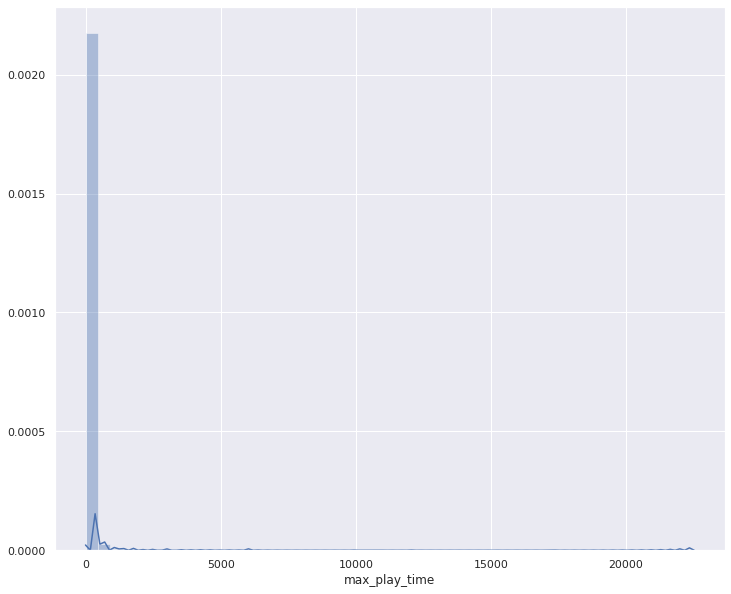

In [139]:
sns.distplot(data["max_play_time"])

#### a szebb, értelmesebb megjelenítésért letrimmelem a kiugró értékeket

In [153]:
data.loc[:, "max_play_time_trimmed"] = (
    data["max_play_time"].apply(lambda x: x if x < 500 else 500)
)

#### szélesebb osztásközöket hozok létre, hogy ne legyen foghíjas az ábra

In [141]:
bins = np.linspace(data["max_play_time"].min(), 500, 20)

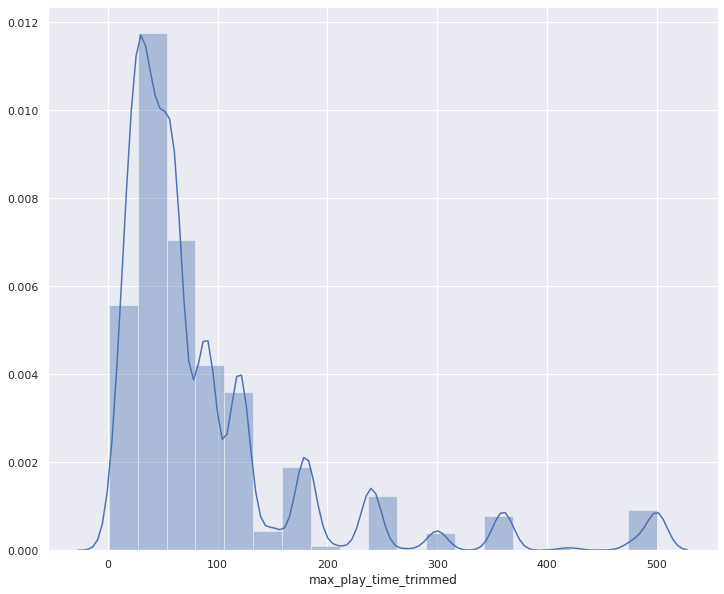

In [142]:
sns.distplot(data["max_play_time_trimmed"], bins=bins)

### # folytonos eloszlások ábrázolása

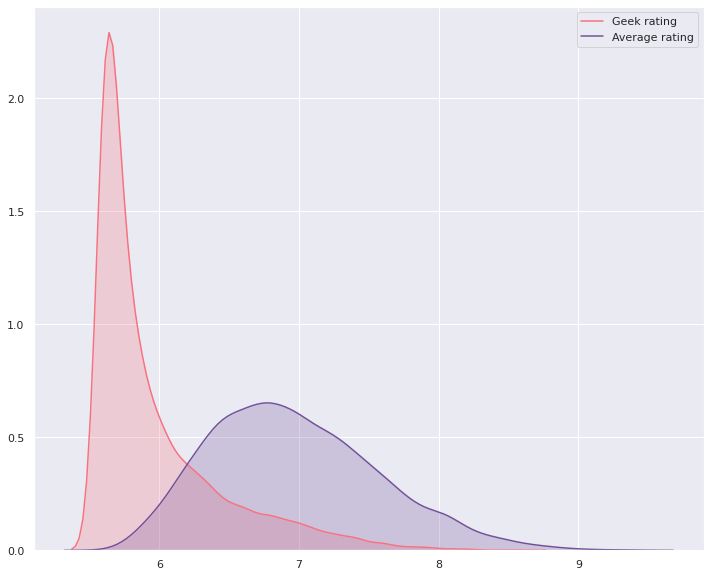

In [143]:
sns.kdeplot(
    data["geek_rating"], shade=True, color="#f67280", label="Geek rating"
)
sns.kdeplot(
    data["avg_rating"], shade=True, color="#72519b", label="Average rating"
)

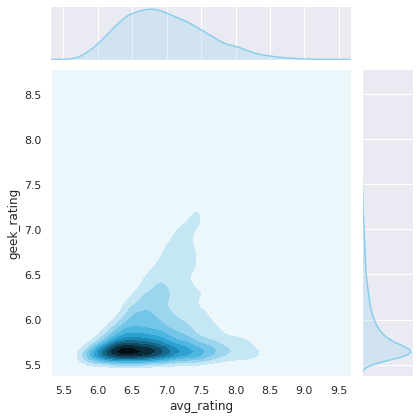

In [144]:
sns.jointplot(
    x=data["avg_rating"],
    y=data["geek_rating"],
    kind="kde",
    color="#87CEEB",
)

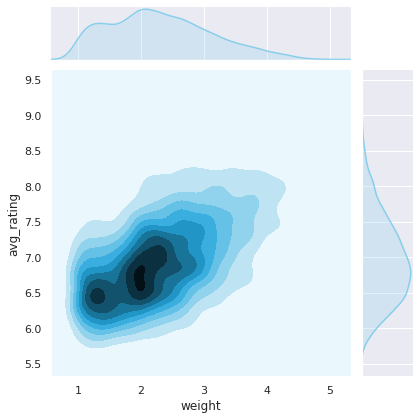

In [145]:
sns.jointplot(
    x=data["weight"],
    y=data["avg_rating"],
    kind="kde",
    color="#87CEEB",
)

--------------

### # scatterplot

In [146]:
top100 = data.iloc[:100]

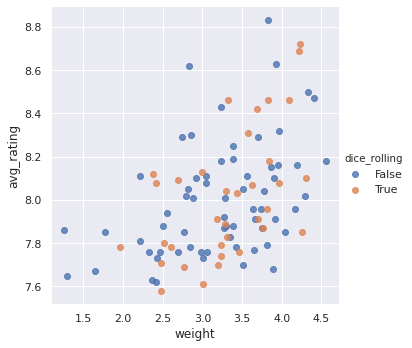

In [147]:
sns.lmplot(x="weight", y="avg_rating", data=top100, fit_reg=False, hue="dice_rolling")

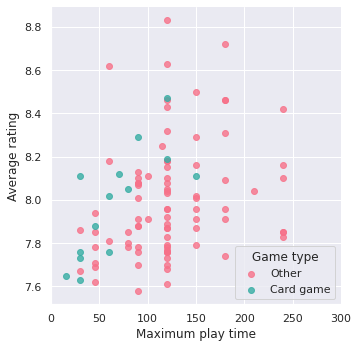

In [148]:
sns.lmplot(
    x="max_play_time",
    y="avg_rating",
    data=top100,
    fit_reg=False,
    hue="card_game",
    legend=False,
    palette="husl",
)

plt.xlabel("Maximum play time")
plt.ylabel("Average rating")
plt.xlim(0, 300)
plt.legend(title="Game type", loc="lower right", labels=["Other", "Card game"])

In [152]:
top100.loc[:, "max_play_time_trimmed2"] = top100["max_play_time_trimmed"].apply(
    lambda x: x if x < 200 else 200
)

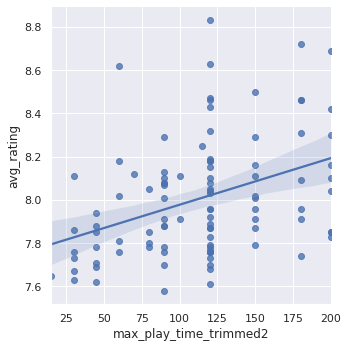

In [150]:
sns.lmplot(
    x="max_play_time_trimmed2",
    y="avg_rating",
    data=top100,
    fit_reg=True,
    legend=False,
    palette="husl",
)

In [155]:
top100.loc[:, "binned_rank"] = (
    pd.cut(top100["bgg_rank"], bins=np.linspace(0, 100, 11))
    .apply(lambda x: int(x.right))
    .values
)

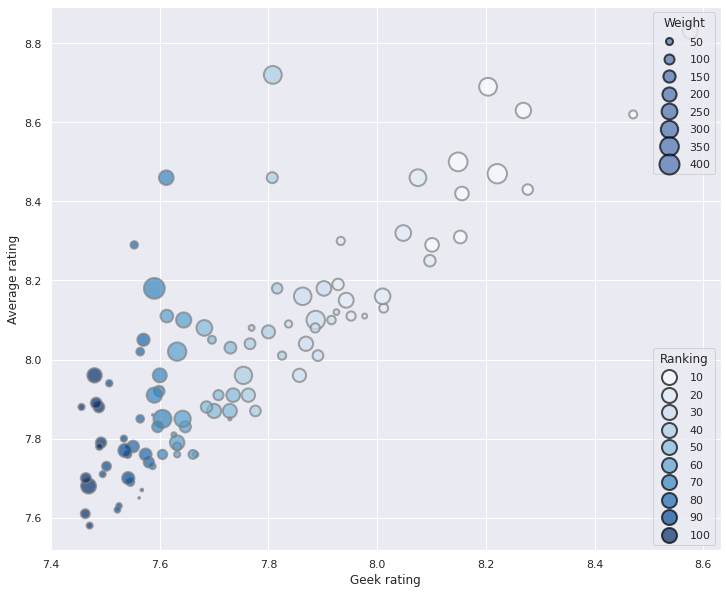

In [156]:
fig, ax = plt.subplots()

scatter = ax.scatter(
    top100["geek_rating"],
    top100["avg_rating"],
    s=top100["weight"] ** 4,
    c=top100["binned_rank"],
    cmap="Blues",
    alpha=0.7,
    edgecolors="grey",
    linewidth=2,
)

plt.xlabel("Geek rating")
plt.ylabel("Average rating")

color_legend = ax.legend(
    *scatter.legend_elements(prop="colors", size=15, markeredgecolor="black"),
    loc="lower right",
    title="Ranking"
)

ax.add_artist(color_legend)

size_legend = ax.legend(
    *scatter.legend_elements(prop="sizes", color=None, markeredgecolor="black"),
    loc="upper right",
    title="Weight"
)

--------------

### # hőtérkép

In [157]:
matrix = data.loc[:, data.dtypes.loc[lambda s: s != object].index].corr()

In [158]:
matrix

,bgg_rank,year,geek_rating,avg_rating,num_voters,min_age,weight,min_player_num,max_player_num,min_play_time,max_play_time,card_game,dice_rolling,max_play_time_trimmed
bgg_rank,1.000000,0.009677,-0.831765,-0.304520,-0.419708,-0.102270,-0.140608,0.028898,0.020540,0.012683,0.001555,-0.001774,-0.018328,0.028388
year,0.009677,1.000000,-0.012301,0.043845,-0.034826,0.049587,-0.023147,-0.024468,0.006197,-0.007738,-0.004630,0.015162,0.005961,-0.008924
geek_rating,-0.831765,-0.012301,1.000000,0.382716,0.648013,0.127069,0.190289,-0.047439,-0.016263,-0.017633,-0.010780,-0.026606,0.019975,0.002432
avg_rating,-0.304520,0.043845,0.382716,1.000000,0.143137,0.364238,0.527109,-0.215349,-0.034730,0.115755,0.160655,-0.160845,0.198470,0.399488
num_voters,-0.419708,-0.034826,0.648013,0.143137,1.000000,0.007787,0.023466,0.015860,-0.001660,-0.026251,-0.024159,0.018250,-0.010065,-0.044707
min_age,-0.102270,0.049587,0.127069,0.364238,0.007787,1.000000,0.535169,-0.051925,-0.045725,0.174018,0.120732,-0.078240,0.157732,0.374368
weight,-0.140608,-0.023147,0.190289,0.527109,0.023466,0.535169,1.000000,-0.186035,-0.082770,0.246633,0.250744,-0.303700,0.215090,0.642393
min_player_num,0.028898,-0.024468,-0.047439,-0.215349,0.015860,-0.051925,-0.186035,1.000000,0.058545,-0.020909,-0.050759,0.074624,-0.173447,-0.117847
max_player_num,0.020540,0.006197,-0.016263,-0.034730,-0.001660,-0.045725,-0.082770,0.058545,1.000000,-0.014719,-0.014030,0.035670,-0.019802,-0.047686
min_play_time,0.012683,-0.007738,-0.017633,0.115755,-0.026251,0.174018,0.246633,-0.020909,-0.014719,1.000000,0.650514,-0.101676,0.111411,0.382045


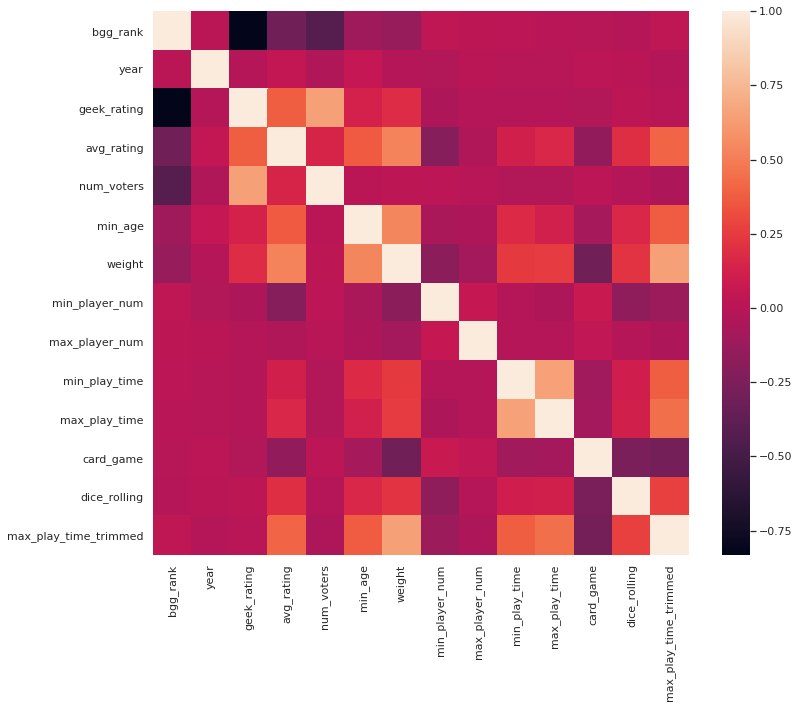

In [159]:
sns.heatmap(matrix)

---------------

### # szófelhő

In [160]:
from wordcloud import WordCloud
from PIL import Image

In [161]:
text = " ".join(data["name"]).lower()

In [162]:
mask = np.array(Image.open("heart.jpg"))

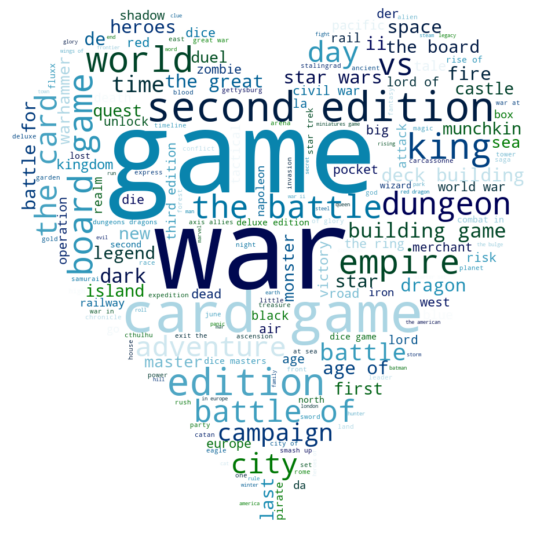

In [163]:
wordcloud = WordCloud(mask=mask, background_color="white", colormap="ocean").generate(
    text
)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

-----------

### # hálózat

In [164]:
import networkx as nx
import itertools
from pyvis import network as net

#### ez a hálózat a játéktervező művészeket ábrázolja
#### két művész között akkor van él, ha dolgoztak közösen társasjátékon
#### az alkotók listái alapján legenerálom a hálózat összes élét

In [165]:
edges = pd.DataFrame(
    sum(
        data["artists"].apply(
            lambda l: [sorted(edge) for edge in itertools.combinations(l, 2)]
        ),
        [],
    )
).drop_duplicates()

In [166]:
edges.sample(10)

,0,1
19613,ed cox,matthew sweeney
11821,rafał hrynkiewicz,reiko murakami
53780,ethan pasternack,shane small
7775,noah bradley,ron brown
8612,bud cook,paul chadwick
37815,pieter bruegel the elder,quentin matsys
7744,daarken,whit brachna
51434,dennis calero,john howe
46904,keith hill,larry kessling
12389,ian parovel,jordi valbuena


#### ebből hálózatot építek

In [167]:
artist_network = nx.Graph()

In [168]:
artist_network.add_edges_from(edges.values)

In [169]:
print(nx.info(artist_network))

Name: 
Type: Graph
Number of nodes: 4857
Number of edges: 51852
Average degree:  21.3515


#### most véletlenszerűen választok kétszázat az 1000 legtöbb társalkotóval rendelkező művész közül, hogy ne haljon le a gépem a vizualizációtól

In [178]:
chosen_artists = (
    pd.Series(dict(artist_network.degree()))
    .sort_values(ascending=False)
    .iloc[:1000]
    .sample(200)
    .index.tolist()
)

In [179]:
small_network = artist_network.subgraph(chosen_artists)

In [180]:
small_network = small_network.subgraph(max(nx.connected_components(small_network), key=len))

In [181]:
print(nx.info(small_network))

Name: 
Type: Graph
Number of nodes: 164
Number of edges: 1418
Average degree:  17.2927


#### egyszerű ábrázolás

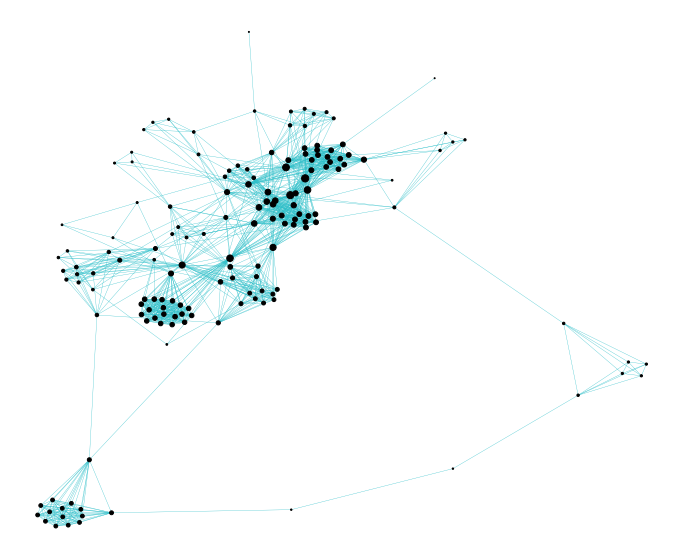

In [192]:
plt.axis("off")

nx.draw_networkx(
    small_network,
    node_size=[d[1] for d in small_network.degree()],
    node_color="#000000",
    edge_color="#2ABFC9",
    width=0.3,
    with_labels=False,
)

#### kirajzolok egy körvonalat, hogy átláthatóbb legyen a hálózat, minden csúcsnak meghatározok egy pozíciót a körvonalon

$x^2 + y^2 = r^2 \rightarrow y = ^+_- \sqrt{r^2 - x^2}$

In [221]:
def circle(r, n):

    x_values = (
        np.linspace(-r, r, n // 2 + 1)
        if (n % 2 == 0)
        else np.linspace(-r, r, n // 2 + 2)
    )

    return (
        [(x, np.sqrt(r ** 2 - x ** 2)) for x in x_values[:-1]]
        + [(x, -np.sqrt(r ** 2 - x ** 2)) for x in x_values[::-1][:-1]]
    )[:n]

In [224]:
node_data = (
    pd.DataFrame({"degree": dict(small_network.degree())})
    .sort_values(by="degree", ascending=False)
    .assign(position=circle(100, small_network.number_of_nodes()))
)

In [225]:
node_data.sample(5)

,degree,position
alan m. clark,5,"(-46.83544303797468, -88.35406767906404)"
loren fetterman,15,"(97.46835443037975, 22.35888826918443)"
unique litani soparie,21,"(29.11392405063293, 95.66806900096802)"
tom wänerstrand,3,"(-82.27848101265823, -56.835302077578845)"
john park,5,"(-41.77215189873417, -90.8575111135512)"


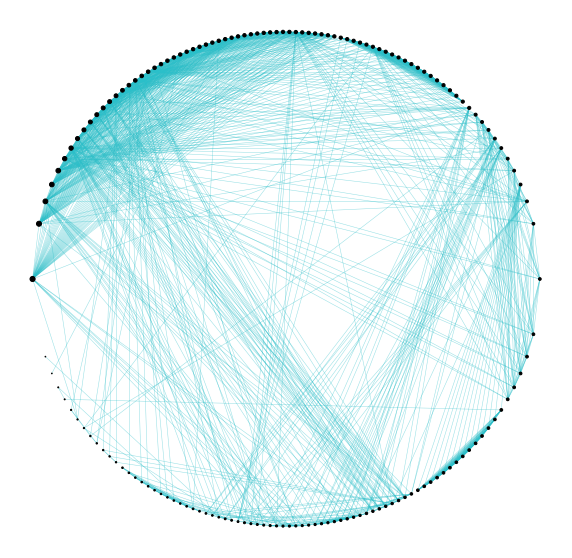

In [226]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.axis("off")
fig.set_facecolor("#FFFFFF")

nx.draw_networkx_nodes(
    small_network,
    node_data["position"],
    ax=ax,
    nodelist=node_data.index.tolist(),
    node_size=node_data["degree"] / 2,
    node_color="#000000",
)

nx.draw_networkx_edges(
    small_network,
    node_data["position"],
    edgelist=small_network.edges,
    edge_color="#2ABFC9",
    arrows=False,
    alpha=0.5,
    width=0.5,
)

#### fizikai tulajdonságokkal ellátott, interaktív ábra

In [227]:
def nx_to_pyvis(network):

    pyvis_network = net.Network(
        notebook=True,
        height="750px",
        width="100%",
        bgcolor="#222222",
        font_color="white",
    )
    for node in network.nodes():
        pyvis_network.add_node(
            node, mass=network.degree(node), size=network.degree(node)
        )

    for edge in network.edges():
        pyvis_network.add_edge(edge[0], edge[1])

    return pyvis_network

In [228]:
pyvis_artist_network = nx_to_pyvis(small_network)
pyvis_artist_network.show('artist_network.html')